In [1]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [2]:
diabetes = datasets.load_diabetes() # load data

In [3]:
diabetes.data.shape

(442, 10)

In [4]:
diabetes.target.shape 

(442,)

In [5]:
diabetes.feature_names 

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

### Fit intercept = true 

In [7]:
# Sperate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)
# There are three steps to model something with sklearn
# 1. Set up the model
model = LinearRegression(fit_intercept=True)
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

0.3322332173106184

In [13]:
model.coef_ # 

array([ -35.55025079, -243.16508959,  562.76234744,  305.46348218,
       -662.70290089,  324.20738537,   24.74879489,  170.3249615 ,
        731.63743545,   43.0309307 ])

In [14]:
model.intercept_ 

152.5380470138517

In [15]:
model.predict(X_test) 

array([238.46949509, 248.92812015, 164.05732579, 120.30774826,
       187.42483427, 259.04746969, 113.55788482, 188.07762807,
       149.49521726, 236.00758247, 172.24561893, 178.87936198,
       109.16034679,  92.13333574, 243.32766187,  87.35445583,
       155.72165684,  66.98992013, 100.42233598, 218.0957236 ,
       196.6646301 , 161.2972646 , 161.70870434, 156.52404017,
       197.88770177, 167.58280539, 120.7427979 ,  84.84033238,
       192.03438449, 160.60496231, 175.17348034,  84.22759674,
       145.80002729, 145.97264454, 140.96436257, 197.00423168,
       165.94319214, 190.6597389 , 128.22361933, 206.41497077,
        84.3575017 , 164.02262498, 144.10639773, 184.68996616,
       177.80076449,  74.33261184, 143.36644877, 138.68063137,
       120.80857573, 234.34288711, 161.94132344,  74.54325994,
       154.71683591, 156.78815442, 237.41798756, 174.23210042,
       190.87871793, 118.98140389, 132.20521501, 168.52914416,
       214.73950634, 171.42284128, 157.37648738, 108.86

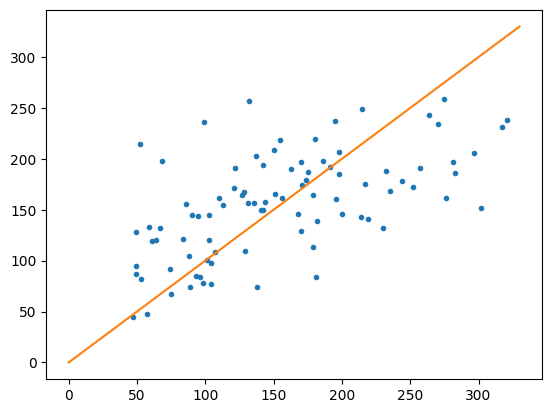

In [11]:
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

### Fit intercept = false 

In [16]:
# Sperate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)
# There are three steps to model something with sklearn
# 1. Set up the model
model = LinearRegression(fit_intercept=False)
# 2. Use fit
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

-4.325477984673438

In [17]:
model.coef_ 

array([  53.2175059 ,  -98.21636348,  562.28384536,  210.63329087,
        105.86928998, -511.49182488, -128.85164303,  385.2818476 ,
        402.77562935,   18.85279567])

In [18]:
model.intercept_ 

0.0

In [ ]:
model.predict(X_test) 

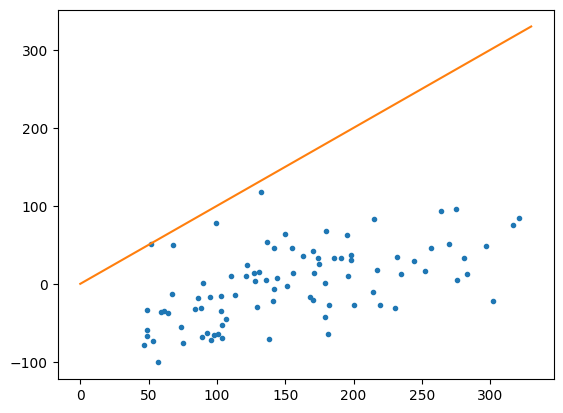

In [19]:
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

###  Regression without sklearn and without gradient descent 

In [18]:
X_train.shape

(353, 10)

In [19]:
X_train_with_intercept = np.c_[np.ones((X_train.shape[0], 1)), X_train]
print(X_train_with_intercept.shape)


(353, 11)


In [17]:

X_train_transpose_with_intercept = np.transpose(X_train_with_intercept)
X_train_transpose_dot_X_train_with_intercept = np.dot(X_train_transpose_with_intercept, X_train_with_intercept)
inverse_X_train_transpose_dot_X_train_with_intercept = np.linalg.inv(X_train_transpose_dot_X_train_with_intercept)
X_train_transpose_dot_y_train_with_intercept = np.dot(X_train_transpose_with_intercept, y_train)
beta_with_intercept = np.dot(inverse_X_train_transpose_dot_X_train_with_intercept, X_train_transpose_dot_y_train_with_intercept)


intercept = beta_with_intercept[0]
coefficients = beta_with_intercept[1:]


print("Intercept (b):", intercept)
print("Coefficients (a):", coefficients)

(353, 11)
Intercept (b): 152.53804701385167
Coefficients (a): [ -35.55025079 -243.16508959  562.76234744  305.46348218 -662.70290089
  324.20738537   24.74879489  170.3249615   731.63743545   43.0309307 ]


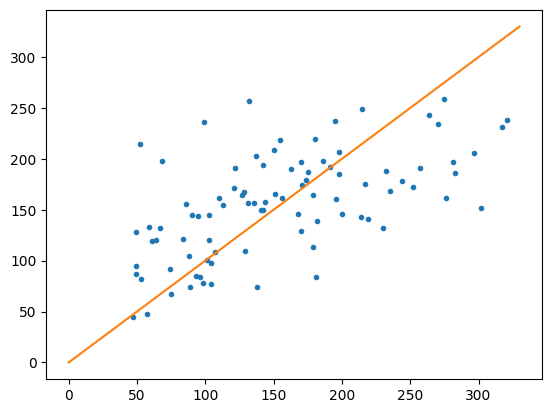

In [16]:
# plot prediction and actual data
y_pred = np.dot(X_test, coefficients) + intercept
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

### Regression with gradient descent 

In [20]:
class LinearRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

In [25]:
# our custom model
model = LinearRegression(learning_rate=0.1, n_iters=100000)
model.fit(X_train, y_train)
y_pred_custom = model.predict(X_test)



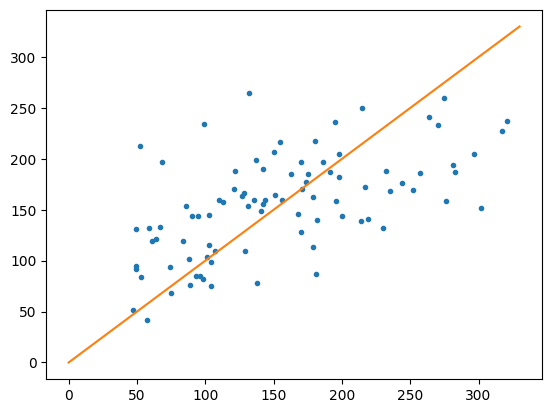

In [26]:

y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')


x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()